In [2]:
from PIL import Image
from torch.utils.data import Dataset, DataLoader, random_split
import torch.optim as optim
from tqdm import tqdm
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import os


class ASLDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.classes = sorted(os.listdir(root_dir))
        self.transform = transform
        self.image_paths = []
        self.labels = []

        for idx, class_name in enumerate(self.classes):
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir):
                for img_name in os.listdir(class_dir):
                    img_path = os.path.join(class_dir, img_name)
                    self.image_paths.append(img_path)
                    self.labels.append(idx)

        print(f"🔢 Завантажено {len(self.image_paths)} зображень у {len(self.classes)} класах.")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = Image.open(self.image_paths[idx]).convert('RGB')
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


data_dir = "/Users/mak/PycharmProjects/PythonProject6/ASL Alphabet/asl_alphabet_train/asl_alphabet_train"


transform = transforms.Compose([
    transforms.Resize((64, 64)),  # можна змінити на 128x128
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])


dataset = ASLDataset(root_dir=data_dir, transform=transform)


train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"📊 Тренувальних зразків: {len(train_dataset)}")
print(f"📊 Валідаційних зразків: {len(val_dataset)}")


🔢 Завантажено 87000 зображень у 29 класах.
📊 Тренувальних зразків: 69600
📊 Валідаційних зразків: 17400


Epoch 1/10 Training: 100%|██████████| 2175/2175 [04:05<00:00,  8.87it/s]


Епоха 1/10, Втрата: 0.4733, Точність: 84.99%


Epoch 1/10 Validation: 100%|██████████| 544/544 [00:29<00:00, 18.50it/s]


Точність на валідаційному наборі: 96.57%


Epoch 2/10 Training: 100%|██████████| 2175/2175 [04:02<00:00,  8.97it/s]


Епоха 2/10, Втрата: 0.0644, Точність: 97.97%


Epoch 2/10 Validation: 100%|██████████| 544/544 [00:30<00:00, 18.06it/s]


Точність на валідаційному наборі: 98.70%


Epoch 3/10 Training: 100%|██████████| 2175/2175 [04:07<00:00,  8.78it/s]


Епоха 3/10, Втрата: 0.0317, Точність: 99.04%


Epoch 3/10 Validation: 100%|██████████| 544/544 [00:29<00:00, 18.30it/s]


Точність на валідаційному наборі: 99.08%


Epoch 4/10 Training: 100%|██████████| 2175/2175 [04:09<00:00,  8.72it/s]


Епоха 4/10, Втрата: 0.0318, Точність: 99.01%


Epoch 4/10 Validation: 100%|██████████| 544/544 [00:30<00:00, 17.79it/s]


Точність на валідаційному наборі: 99.12%


Epoch 5/10 Training: 100%|██████████| 2175/2175 [04:08<00:00,  8.75it/s]


Епоха 5/10, Втрата: 0.0228, Точність: 99.38%


Epoch 5/10 Validation: 100%|██████████| 544/544 [00:32<00:00, 16.75it/s]


Точність на валідаційному наборі: 99.08%


Epoch 6/10 Training: 100%|██████████| 2175/2175 [04:22<00:00,  8.29it/s]


Епоха 6/10, Втрата: 0.0191, Точність: 99.46%


Epoch 6/10 Validation: 100%|██████████| 544/544 [00:32<00:00, 16.52it/s]


Точність на валідаційному наборі: 99.55%


Epoch 7/10 Training: 100%|██████████| 2175/2175 [04:28<00:00,  8.09it/s]


Епоха 7/10, Втрата: 0.0204, Точність: 99.45%


Epoch 7/10 Validation: 100%|██████████| 544/544 [00:31<00:00, 17.35it/s]


Точність на валідаційному наборі: 99.04%


Epoch 8/10 Training: 100%|██████████| 2175/2175 [04:10<00:00,  8.67it/s]


Епоха 8/10, Втрата: 0.0154, Точність: 99.60%


Epoch 8/10 Validation: 100%|██████████| 544/544 [00:30<00:00, 17.94it/s]


Точність на валідаційному наборі: 99.41%


Epoch 9/10 Training: 100%|██████████| 2175/2175 [04:05<00:00,  8.85it/s]


Епоха 9/10, Втрата: 0.0146, Точність: 99.58%


Epoch 9/10 Validation: 100%|██████████| 544/544 [00:31<00:00, 17.04it/s]


Точність на валідаційному наборі: 99.71%


Epoch 10/10 Training: 100%|██████████| 2175/2175 [04:11<00:00,  8.65it/s]


Епоха 10/10, Втрата: 0.0123, Точність: 99.67%


Epoch 10/10 Validation: 100%|██████████| 544/544 [00:30<00:00, 17.73it/s]


Точність на валідаційному наборі: 99.90%
Навчання завершено!


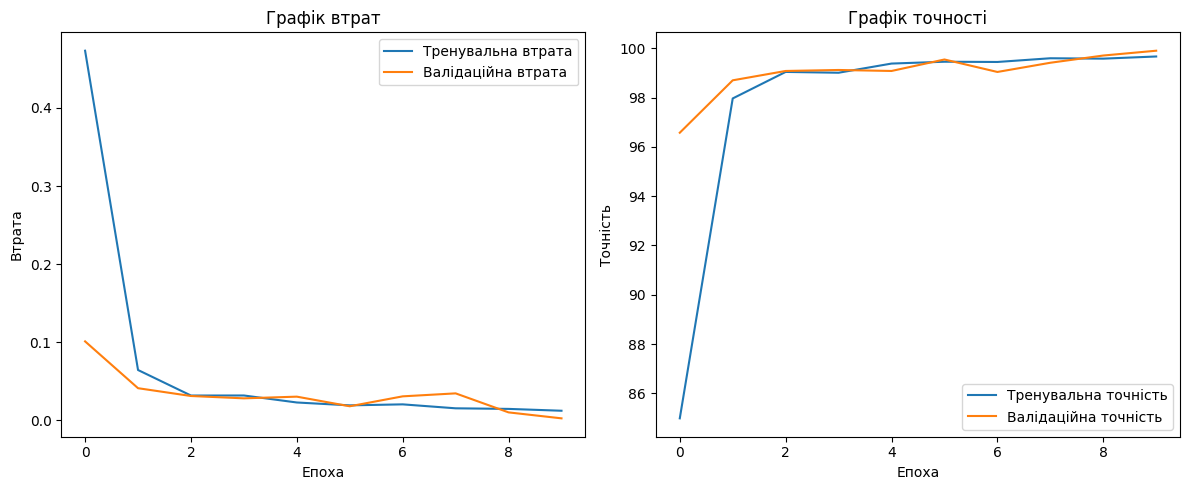

In [10]:


class GestureRecognitionCNN(nn.Module):
    def __init__(self):
        super(GestureRecognitionCNN, self).__init__()

        # Згорткові шари
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)


        self.pool = nn.MaxPool2d(2, 2)

        # Лінійні шари
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 29)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)  # Перетворення вектора для лінійних шарів
        x = nn.ReLU()(self.fc1(x))  # Лінійний шар + ReLU
        x = self.fc2(x)  # Останній лінійний шар для прогнозування
        return x


model = GestureRecognitionCNN()


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()


def train_model(model, train_loader, val_loader, num_epochs=10):
    best_accuracy = 0.0


    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Прогресбар
        for images, labels in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} Training"):
            images, labels = images.to(device), labels.to(device)


            optimizer.zero_grad()


            outputs = model(images)
            loss = criterion(outputs, labels)


            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            # Обчислення точності
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        train_accuracy = 100 * correct / total
        train_losses.append(running_loss / len(train_loader))
        train_accuracies.append(train_accuracy)

        print(f"Епоха {epoch+1}/{num_epochs}, Втрата: {running_loss/len(train_loader):.4f}, Точність: {train_accuracy:.2f}%")

        # Оцінка на валідаційному наборі
        model.eval()
        correct = 0
        total = 0
        running_val_loss = 0.0
        with torch.no_grad():
            for images, labels in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} Validation"):
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_accuracy = 100 * correct / total
        val_losses.append(running_val_loss / len(val_loader))
        val_accuracies.append(val_accuracy)

        print(f"Точність на валідаційному наборі: {val_accuracy:.2f}%")

        # Збереження найкращої моделі
        if val_accuracy > best_accuracy:
            best_accuracy = val_accuracy
            torch.save(model.state_dict(), "best_model.pth")

    print("Навчання завершено!")


    plt.figure(figsize=(12, 5))

    # Графік втрат
    plt.subplot(1, 2, 1)
    plt.plot(range(num_epochs), train_losses, label='Тренувальна втрата')
    plt.plot(range(num_epochs), val_losses, label='Валідаційна втрата')
    plt.xlabel('Епоха')
    plt.ylabel('Втрата')
    plt.title('Графік втрат')
    plt.legend()

    # Графік точності
    plt.subplot(1, 2, 2)
    plt.plot(range(num_epochs), train_accuracies, label='Тренувальна точність')
    plt.plot(range(num_epochs), val_accuracies, label='Валідаційна точність')
    plt.xlabel('Епоха')
    plt.ylabel('Точність')
    plt.title('Графік точності')
    plt.legend()

    plt.tight_layout()
    plt.show()


train_model(model, train_loader, val_loader, num_epochs=10)


['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space']
OK Істинний: T, Прогноз: T
OK Істинний: P, Прогноз: P
OK Істинний: F, Прогноз: F
OK Істинний: G, Прогноз: G
OK Істинний: U, Прогноз: U
OK Істинний: Q, Прогноз: Q
OK Істинний: M, Прогноз: M
OK Істинний: W, Прогноз: W


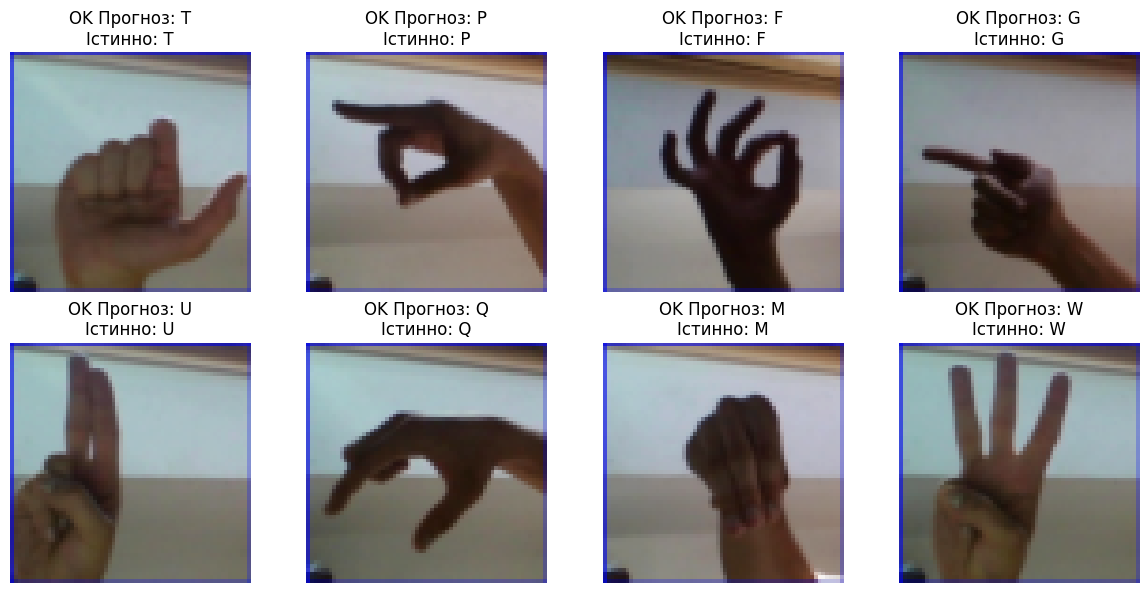

In [3]:

# === Параметри ===
BATCH_SIZE = 32
IMAGE_SIZE = 64
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# === Трансформації ===
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])






test_dir = "/Users/mak/PycharmProjects/PythonProject6/ASL Alphabet/asl_alphabet_test/asl_alphabet_test"
test_dataset = ImageFolder(root=test_dir, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)


class_names = test_dataset.classes
print(class_names)


class GestureRecognitionCNN(nn.Module):
    def __init__(self):
        super(GestureRecognitionCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(128 * 8 * 8, 512)
        self.fc2 = nn.Linear(512, 29)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = self.pool(nn.ReLU()(self.conv3(x)))
        x = x.view(-1, 128 * 8 * 8)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x


model = GestureRecognitionCNN()
model.load_state_dict(torch.load("best_model.pth", map_location=device))
model.to(device)


import numpy as np

def show_predictions(model, test_loader, class_names, num_samples=8):
    model.eval()
    images_shown = 0
    plt.figure(figsize=(12, 6))

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)

            for i in range(len(images)):
                if images_shown >= num_samples:
                    break

                true_label = class_names[labels[i].item()]
                pred_label = class_names[predicted[i].item()]

                # Денормалізація для коректного відображення
                image = images[i].cpu().permute(1, 2, 0).numpy()
                image = image * np.array([0.229, 0.224, 0.225]) + np.array([0.485, 0.456, 0.406])
                image = np.clip(image, 0, 1)


                marker = "OK" if true_label == pred_label else "WRONG"


                print(f"{marker} Істинний: {true_label}, Прогноз: {pred_label}")
                plt.subplot(2, num_samples // 2, images_shown + 1)
                plt.imshow(image)
                plt.title(f"{marker} Прогноз: {pred_label}\nІстинно: {true_label}")
                plt.axis('off')

                images_shown += 1

            if images_shown >= num_samples:
                break

    plt.tight_layout()
    plt.show()



show_predictions(model, test_loader, class_names)
